# Fashion Class Classification

## Importing Data

Download the dataset from [HERE](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P39-Fashion-MNIST-Datasets.zip).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv", sep=",")

In [3]:
fashion_test_df = pd.read_csv("fashion-mnist_test.csv", sep=",")

## Visualization of the Dataset

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype="float32")

In [11]:
testing = np.array(fashion_test_df, dtype="float32")

7.0

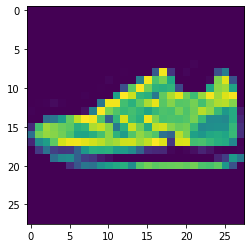

In [12]:
import random
i = random.randint(0, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

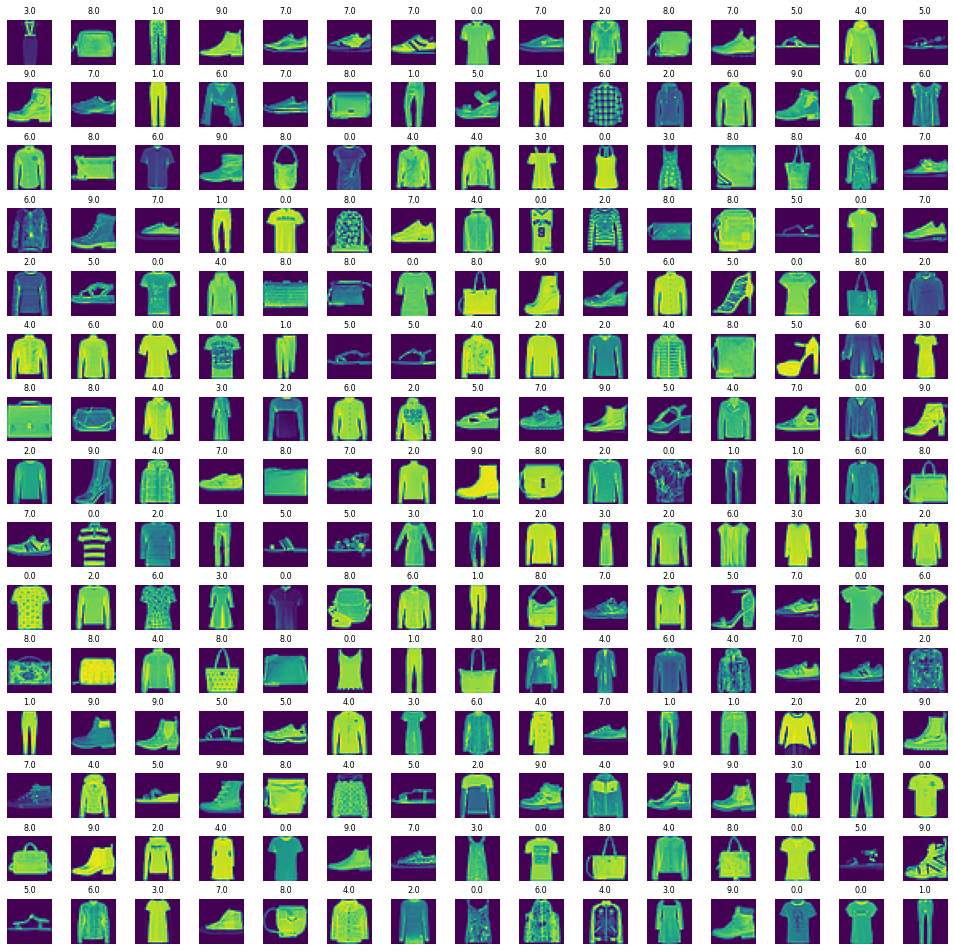

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 255 array

n_training = len(training)

for i in range(W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.4)

## Training the Model

In [14]:
X_train = training[:, 1:] / 255
y_train = training[:, 0]

In [15]:
X_test = testing[:, 1:] / 255
y_test = testing[:, 0]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_validate.shape

(12000, 28, 28, 1)

In [22]:
import keras

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [25]:
cnn_model = Sequential()

In [26]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation="relu"))

In [27]:
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

In [28]:
cnn_model.add(Flatten())

In [30]:
cnn_model.add(Dense(32, activation="relu"))

In [31]:
cnn_model.add(Dense(32, activation="sigmoid"))

In [32]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [40]:
cnn_model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 1s 15ms/step - loss: 0.3560 - accuracy: 0.8693 - val_loss: 0.3846 - val_accuracy: 0.8620
Epoch 2/50
94/94 [==============================] - 1s 15ms/step - loss: 0.3517 - accuracy: 0.8711 - val_loss: 0.3834 - val_accuracy: 0.8613
Epoch 3/50
94/94 [==============================] - 1s 15ms/step - loss: 0.3508 - accuracy: 0.8721 - val_loss: 0.3852 - val_accuracy: 0.8622
Epoch 4/50
94/94 [==============================] - 1s 15ms/step - loss: 0.3504 - accuracy: 0.8719 - val_loss: 0.3830 - val_accuracy: 0.8634
Epoch 5/50
94/94 [==============================] - 1s 14ms/step - loss: 0.3493 - accuracy: 0.8722 - val_loss: 0.3839 - val_accuracy: 0.8618
Epoch 6/50
94/94 [==============================] - 1s 14ms/step - loss: 0.3485 - accuracy: 0.8731 - val_loss: 0.3839 - val_accuracy: 0.8621
Epoch 7/50
94/94 [==============================] - 1s 14ms/step - loss: 0.3488 - accuracy: 0.8735 - val_loss: 0.3849 - val_accuracy: 0.8627
Epoch 8/50
94

## Evaluating the Model

In [41]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {:.3f}".format(evaluation[1]))

313/313 [==============================] - 0s 921us/step - loss: 0.3472 - accuracy: 0.8750
Test Accuracy: 0.875


In [42]:
predicted_classes = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [59]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

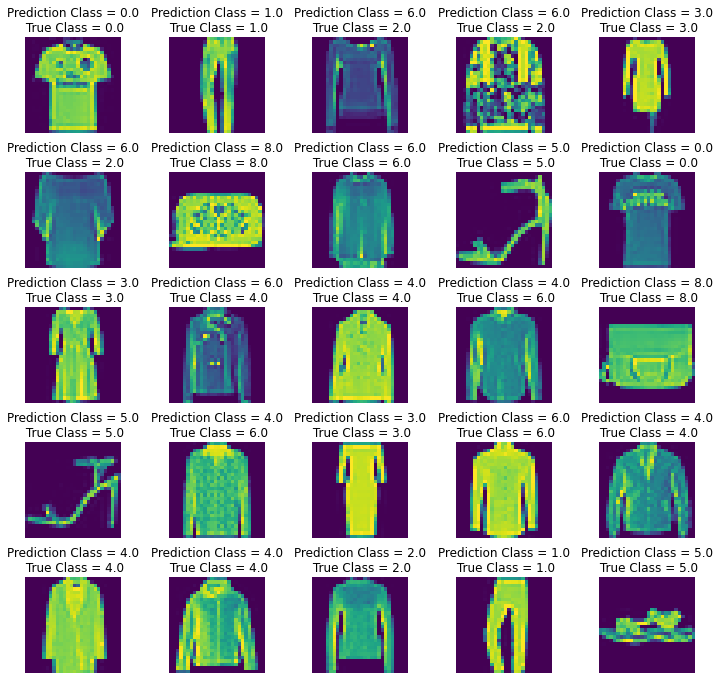

In [60]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in range(L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:.1f}\n True Class = {:.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

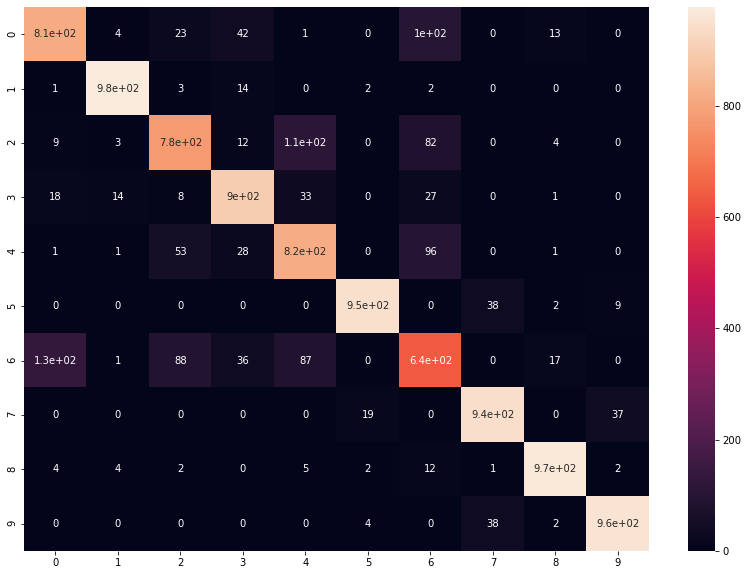

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)

In [62]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.81      0.82      1000
     Class 1       0.97      0.98      0.98      1000
     Class 2       0.81      0.78      0.80      1000
     Class 3       0.87      0.90      0.89      1000
     Class 4       0.78      0.82      0.80      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.67      0.64      0.65      1000
     Class 7       0.92      0.94      0.93      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000

